## Análise exploratória dos dados

Carrega o dataset



In [54]:
import pandas as pd

df=pd.read_csv("./housing.csv")

df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


Checa a presença de valores nulos e os tipos das variáveis


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Checa as medidas resumo das variáveis numéricas

In [56]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Neste experimento, estamos tentando explicar/prever o comportamento da variável `price` (preço) em função da variável `area`.

Portanto, podemos descartar as demais colunas.

In [57]:
df = df[["price", "area"]]

df.head()

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420


Verifica a distribuição das variáveis numéricas e identifica a presença de outliers

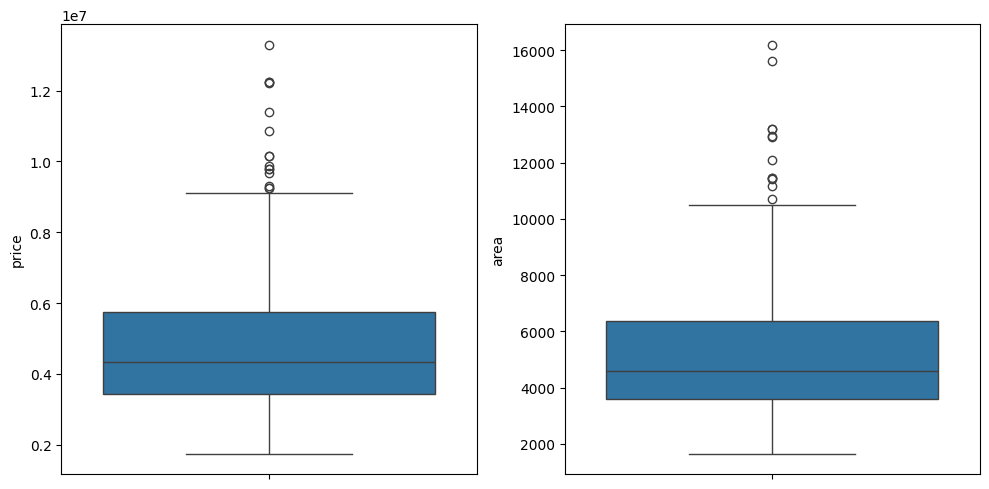

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(df['price'], ax = axs[0])
sns.boxplot(df['area'], ax = axs[1])

plt.tight_layout()

Nota-se que as variáveis `price` e `area` possuem uma quantidade significativa de outliers. 

Para simplicidade, e como temos quantidade suficiente de dados, vamos remover os outliers.

Linhas restantes: 517


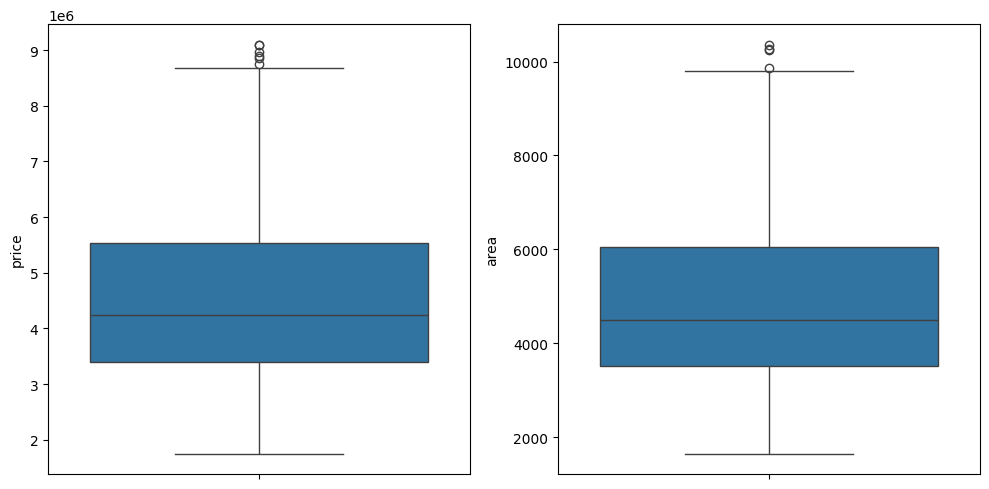

In [59]:
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]

print(f'Linhas restantes: {len(df)}')

fig, axs = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(df['price'], ax = axs[0])
sns.boxplot(df['area'], ax = axs[1])

plt.tight_layout()